In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import mysql.connector


In [83]:
# Connexion à la BD pour Wamp 
host = 'localhost'  
utilisateur = 'root'
mot_de_passe = '' 
base_de_donnees = 'ecotourisme'

# Connexion
connexion = mysql.connector.connect(
    host=host,
    user=utilisateur,
    password=mot_de_passe,
    database=base_de_donnees
)

curseur = connexion.cursor()

if connexion.is_connected():
    print("Connexion à la base de données réussie.")
else:
    print("Échec de la connexion à la base de données.")

Connexion à la base de données réussie.


## Régression linéaire : PIB par habitant vs GES par habitant

Score de performance du modèle: 0.27515087229372537


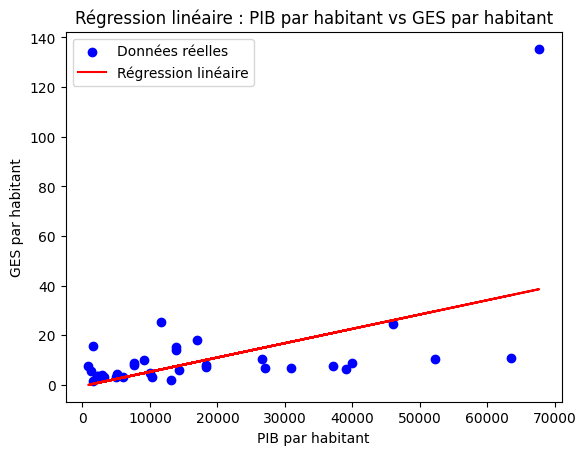

In [84]:
# Traitement des données 

curseur.execute('''
    SELECT pays.nom, economie.id_pays, economie.pibParHab, ecologie.GES_hab
    FROM economie, ecologie, pays
    WHERE economie.annee = 2020 AND ecologie.annee = 2020 AND economie.id_pays = ecologie.id_pays AND pays.id = ecologie.id_pays;
''')

dataset = curseur.fetchall()

df = pd.DataFrame(dataset, columns=['nom','id_pays', 'pibParHab', 'GES_hab'])


# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Sélection des colonnes pour X (PIB) et Y (GES)
X = df[['pibParHab']]
y = df['GES_hab']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle : calcul de R^2
score = model.score(X_test, y_test)
print("Score de performance du modèle:", score)

# Visualiser les résultats
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Régression linéaire')
plt.xlabel('PIB par habitant')
plt.ylabel('GES par habitant')
plt.title('Régression linéaire : PIB par habitant vs GES par habitant')
plt.legend()
plt.show()


## Régression linéaire : PIB par habitant vs IDH

Score de performance du modèle: 0.6660145707729492


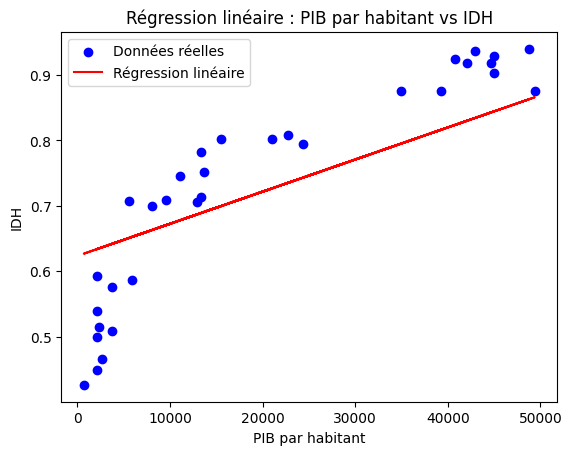

In [85]:
curseur.execute('''
    SELECT economie.id_pays, economie.pibParHab, developpement_humain.Value
    FROM economie, developpement_humain
    WHERE economie.annee = 2021 AND developpement_humain.annee = 2021 AND economie.id_pays = developpement_humain.iso_code;      
''')

dataset = curseur.fetchall()

df = pd.DataFrame(dataset, columns=['id_pays', 'pibParHab', 'Value'])

# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Sélection des colonnes pour X (PIB) et Y (GES)
X = df[['pibParHab']]
y = df['Value']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.str.replace(',', '.').astype(float)
y_test = y_test.str.replace(',', '.').astype(float)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle : calcul de R^2
score = model.score(X_test, y_test)
print("Score de performance du modèle:", score)

# Visualiser les résultats
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Régression linéaire')
plt.xlabel('PIB par habitant')
plt.ylabel('IDH')
plt.title('Régression linéaire : PIB par habitant vs IDH')
plt.legend()
plt.show()


## Régression linéaire : énergie renouvelable vs GES par habitant

Score de performance du modèle: 0.12491170360824622


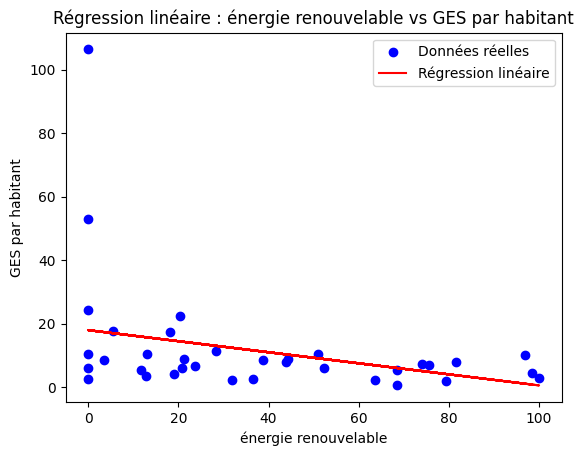

In [86]:

curseur.execute('''
    SELECT ecologie.id_pays, ecologie.GES_hab, ecologie.elecRenew FROM ecologie WHERE ecologie.annee = 2020;
''')

dataset = curseur.fetchall()

df = pd.DataFrame(dataset, columns=['id_pays', 'GES_hab', 'elecRenew'])


# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Sélection des colonnes pour X (PIB) et Y (GES)
X = df[['elecRenew']]
y = df['GES_hab']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle : calcul de R^2
score = model.score(X_test, y_test)
print("Score de performance du modèle:", score)

# Visualiser les résultats
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Régression linéaire')
plt.xlabel('énergie renouvelable')
plt.ylabel('GES par habitant')
plt.title('Régression linéaire : énergie renouvelable vs GES par habitant')
plt.legend()
plt.show()


## Régression linéaire : PIB par habitant vs RNB par habitant

Score de performance du modèle: 0.9799733270829368


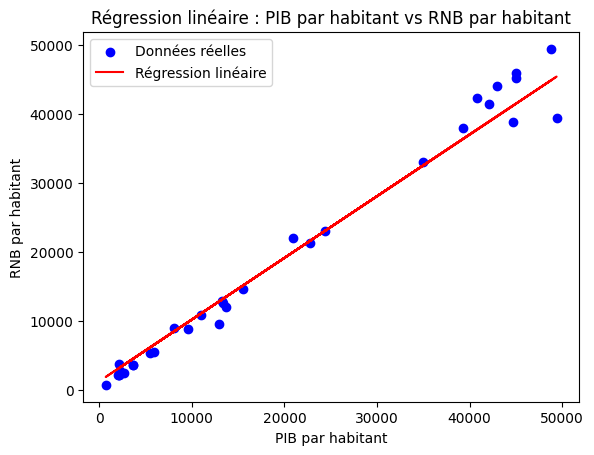

In [87]:

curseur.execute('''
    SELECT developpement_humain.iso_code, developpement_humain.`RNB par hab`, economie.pibParHab
    FROM developpement_humain, economie
    WHERE economie.annee = 2021 AND economie.id_pays = developpement_humain.iso_code;
''')

dataset = curseur.fetchall()

df = pd.DataFrame(dataset, columns=['iso_code', 'RNB par hab', 'pibParHab'])


# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Sélection des colonnes pour X (PIB) et Y (GES)
X = df[['pibParHab']]
y = df['RNB par hab']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle : calcul de R^2
score = model.score(X_test, y_test)
print("Score de performance du modèle:", score)

# Visualiser les résultats
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Régression linéaire')
plt.xlabel('PIB par habitant')
plt.ylabel('RNB par habitant')
plt.title('Régression linéaire : PIB par habitant vs RNB par habitant')
plt.legend()
plt.show()


## Régression linéaire : IDH vs Espérance de vie

Score de performance du modèle: 0.8236259426283099


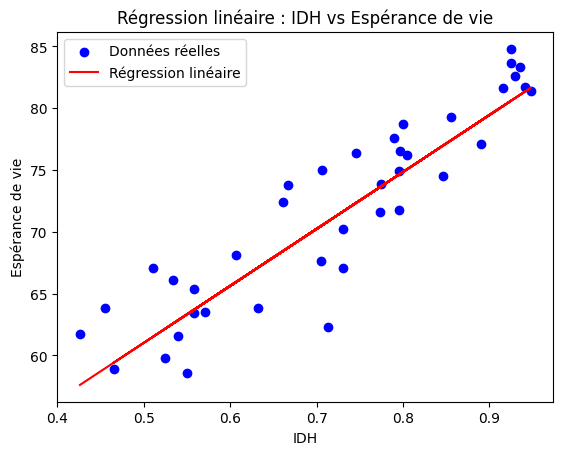

In [88]:

curseur.execute('''
    SELECT developpement_humain.iso_code, developpement_humain.Value, `developpement_humain`.`Espérance de vie` FROM developpement_humain;
''')

dataset = curseur.fetchall()

df = pd.DataFrame(dataset, columns=['iso_code', 'Value', 'Espérance de vie'])


# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Sélection des colonnes pour X (PIB) et Y (GES)
X = df[['Value']]
y = df['Espérance de vie']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Convertir les valeurs en float
X_train['Value'] = X_train['Value'].str.replace(',', '.').astype(float)
X_test['Value'] = X_test['Value'].str.replace(',', '.').astype(float)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle : calcul de R^2
score = model.score(X_test, y_test)
print("Score de performance du modèle:", score)

# Visualiser les résultats
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Régression linéaire')
plt.xlabel('IDH')
plt.ylabel('Espérance de vie')
plt.title('Régression linéaire : IDH vs Espérance de vie')
plt.legend()
plt.show()


## Régression linéaire : IDH vs GPI

Score de performance du modèle: 0.2572653846193691


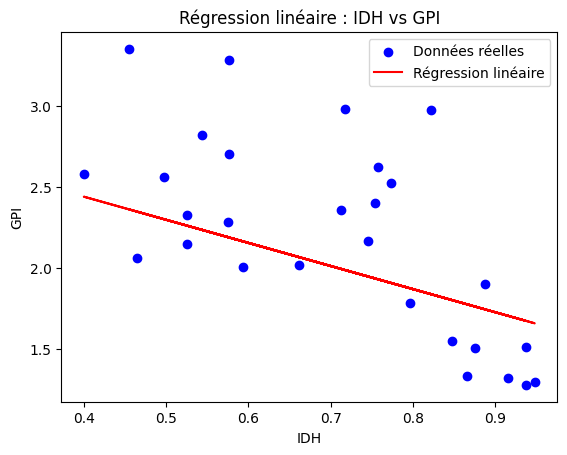

In [89]:

curseur.execute('''
    SELECT developpement_humain.iso_code, developpement_humain.Value, surete.gpi FROM `developpement_humain`, surete WHERE surete.annee = 2021 AND surete.id_pays = developpement_humain.iso_code;
''')

dataset = curseur.fetchall()

df = pd.DataFrame(dataset, columns=['iso_code', 'Value', 'gpi'])


# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Sélection des colonnes pour X (PIB) et Y (GES)
X = df[['Value']]
y = df['gpi']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Convertir les valeurs en float
X_train['Value'] = X_train['Value'].str.replace(',', '.').astype(float)
X_test['Value'] = X_test['Value'].str.replace(',', '.').astype(float)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle : calcul de R^2
score = model.score(X_test, y_test)
print("Score de performance du modèle:", score)

# Visualiser les résultats
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Régression linéaire')
plt.xlabel('IDH')
plt.ylabel('GPI')
plt.title('Régression linéaire : IDH vs GPI')
plt.legend()
plt.show()
